# Problem Set 1


## Instructions (please read everything carefully)

* The questions are given in the cells, below. Your answers should be in this same notebook, beneath each question (insert as many cells as you need), with
  - text in markdown cells. Equations should be in $\LaTeX$
  - fully functional code, with comments so we can understand what you are doing. If you based any part of your code on someone else's initial implementation, cite appropriately.
  - outputs, in presentable format. No need to waste a large amount of time here, but:
    - Plots should have clear titles, axis labels, and legends if needed.
    - If you are asked to run your code for different cases, make separate plots and compare. Please don't ask us to modify your code and rerun to see different results.
    - Numerical answers should have a sensible number of digits with surrounding text that identifies what is being printed.

* Commit and push your notebook to your gitlab fork for this class.  Do not change the name of the file.

* Solutions will be posted soon after the deadline, and your work will be graded within one week.

* Problems are typically posted one week in advance. You are encouraged to work together on problems, but the actual code and the full notebook must be your own work.

* The time it takes to write code is usually unpredictable, particularly at the beginning of the quarter. __Start early__.

* If anything is unclear, please ask! The slack space is a convenient method that gives everyone the benefit of your question and the answer(s).



In [1]:
# these were discussed in lecture
import numpy as np # For mathematical operations on arrays
import matplotlib.pyplot as plt # Used for plotting
%matplotlib inline
%config InlineBackend.figure_format='retina'  # remove or comment this line if not needed
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


## Problem 1
(10 points)

Warm up. In the cell below, write code that produces the following (each item of output on a different line):

  a) The text, "Hello, world."  (don't forget the comma and period. no, you do not need the quotation marks in the output.)
  
  b) The same thing as (a), in any other written language of your choice.
  
  c) Calculate the number of seconds in a typical week, and format the output as, "The number of seconds in a typical week, to 4 significant digits and in scientific notation is (your number here, correctly formatted)." Don't forget the period at the end.
  
  Recall, in python, common format strings:     
 * %.3e - format as exponential with three digits after the decimal
 * %.3f - format as a float with three digits after the decimal
 * %e   - format as exponential
 * %f   - format as a float
 * %d   - format as an integer


In [2]:
# your code here
print("Hello, World.\n")
print("Saludos al mundo.\n")
days = 7
hours = 24
secondsHour = 3600
secondsWeek = (days)*(hours)*(secondsHour)
string = "The number of seconds in a typical week, to 4 significant digits and in scientific notation is "
print(string+'%.3e'%secondsWeek+".")

Hello, World.

Saludos al mundo.

The number of seconds in a typical week, to 4 significant digits and in scientific notation is 6.048e+05.


----------------------
## Problem 2
(15 points)

Subtractive error exploration. As noted in the textbook (section 3.1.2), the solution to the quadratic equation provides a clear example of subtractive errors. For $$ax^2+bx+c=0$$ the solutions are given by $$x_\pm=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$ or, equivalently, $$x_\pm^\prime=\frac{-2c}{b\pm\sqrt{b^2-4ac}}.$$

Many of us didn't learn about the prime solution in school. Interestingly, problems of finite machine precision arise when $b^2>>4ac$. See why? First, write a function that calculates the two solutions both ways (so, 4 results) for any $(a,b,c)$. Then, use it to explore:
  * follow the suggestion in the textbook by setting $a=b=1$ and $c=10^{-n}$ for $n=1, 2, 3,...$. Plot the log of the error (NOTE: you will have to think carefully about how to calculate the error -- **do that before you start coding**, how to handle negative errors, and how to handle errors that, given finite precision, are stored as 0.) as a fuction of $n$ for $n=1...13$. BTW, be careful that you take the $\log_{10}$ not $\log_e$ (a.k.a. $\ln$).
  * repeat for a smaller value of $a= 10^{-3}$.
  * **Bonus** (not required, to be done after you finish everything else on this problem set): make a two-dimensional image (something like the Mandelbrot images in the first lecture), or you can make a 3-d surface plot if you prefer (or both!), of the log of the error for each of the 4 solutions. The two-dimensional field should be $\log(c)$ on the horizontal axis and $\log(4ac)$ or $\log(a)$ on the vertical axis. Be sure to include the color scale or third axis to display the log of the error. Check that the result matches your results above in the right places.

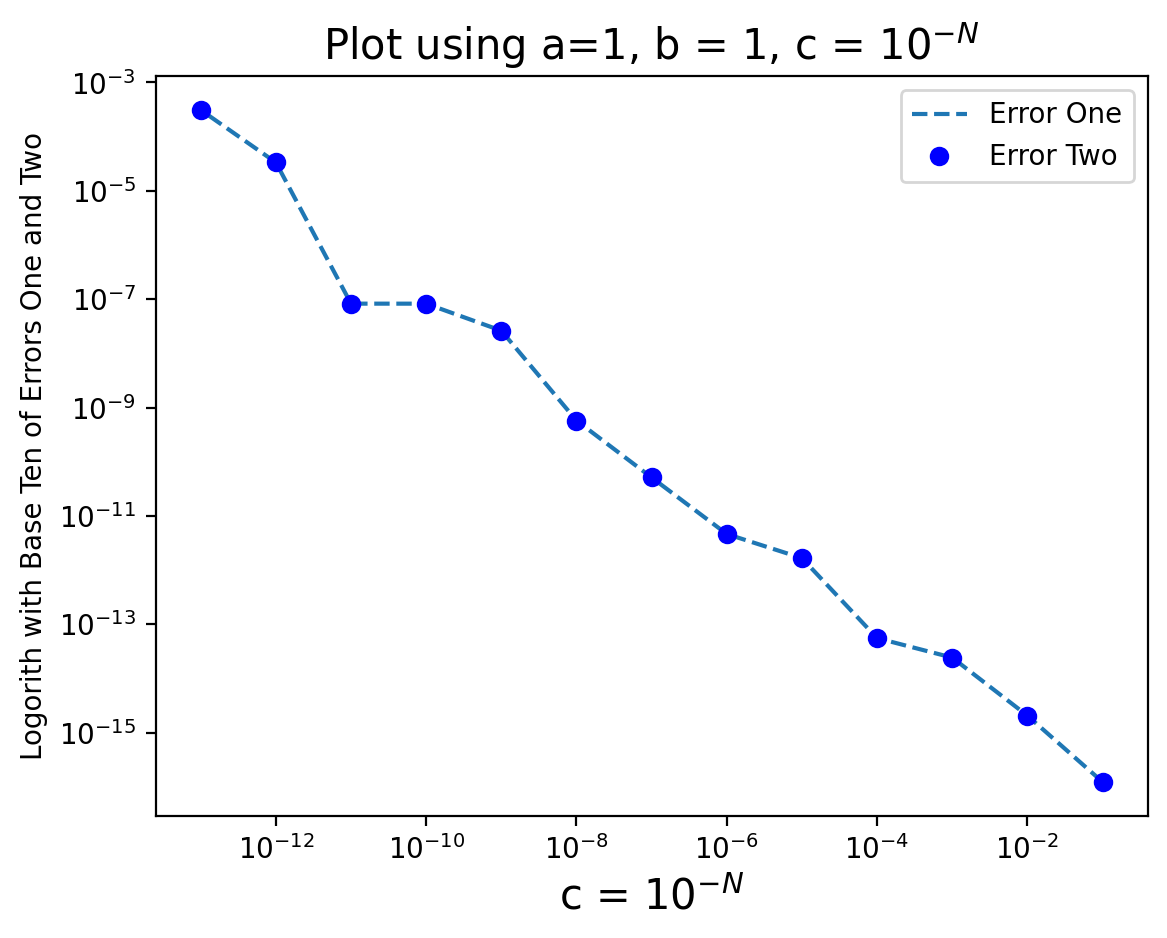

In [3]:
# your code here

#Function that will compute the third parameter c
def thirdParameter():
    c = [] #c is made into an array to store the values calculated
    for i in range(1,14): #Loop that will compute the values of c for 1/10^n
        cParameter = (10**(-i)) 
        c.append(cParameter) #Appends to the array
    return c
    
#Start of the function definition that takes as parameters a and b
def solutionsX(a, b):
    i = 0
    c = thirdParameter() #Call to the third parameter function
    #Array definition for the solutions, listed one through four.
    xOne = [] 
    xTwo = []
    xThree = []
    xFour = []
    while i < 13:
        #The solutions for the non-prime expression
        xOneSolution = (-b + ((b**2 - 4*a*c[i])**0.5)) / (2*a) 
        xTwoSolution = (-b - ((b**2 - 4*a*c[i])**0.5)) / (2*a)
        #The solutions for the prime expression
        xThreeSolution = (-2*c[i])/(b + ((b**2 - 4*a*c[i])**0.5))
        xFourSolution = (-2*c[i])/(b - ((b**2 - 4*a*c[i])**0.5))
        #Appends to the respective arrays
        xOne.append(xOneSolution)
        xTwo.append(xTwoSolution)
        xThree.append(xThreeSolution)
        xFour.append(xFourSolution)
        i += 1
    return (xOne, xTwo, xThree, xFour) #Returns the arrays

#Determines the machines precision, copied it from the Lectures1 file onto mine
#Adjusted N because if N >> i for x[i] then they would be identical and the error wouldn't be noticeable
def epsilonComp():
    N = 100
    eps = 1.0
    for i in range(N):
        eps = eps/2.
        epsOne = 1.0 + eps
    return epsOne

#Function that will take into account the error that arises from subtraction
def subtractionEps(x, y):
    eps = epsilonComp()
    a = x*(eps) - y*(eps)
    return a

#Function that will take into account the error that arises from division
def divisionEps(x, y):
    eps = epsilonComp()
    a = (x*(eps)) / (y*(eps))
    return a

#Function that will take compute the third parameter c with the epsilon factor included
def thirdParameter_C():
    c = [] #c is made into an array to store the values calculated
    eps_C = epsilonComp()
    for i in range(1,14): #Loop that will compute the values of c for 1/10^n
        cParameter = (10**(-i)*eps_C) 
        c.append(cParameter) #Appends to the array
    return c

#Function that will calculate the solutions
#This function takes into account subtraction and division error
def solutionsX_C(a, b):
    i = 0
    eps_C = epsilonComp()
    c = thirdParameter_C() #Call to the third parameter function
    #Array definition for the solutions, listed one through four.
    xOne = [] 
    xTwo = []
    xThree = []
    xFour = []
    while i < 13:
        #The solutions for the non-prime expression
        xOneSolution =  divisionEps(-b+(subtractionEps(b**2,4*a*c[i]))**0.5, 2*a)
        xTwoSolution = divisionEps(-b-(subtractionEps(b**2,4*a*c[i]))**0.5, 2*a)
        #The solutions for the prime expression
        xThreeSolution = divisionEps(-2*c[i],(b + ((subtractionEps(b**2,4*a*c[i]))**0.5)))
        xFourSolution = divisionEps(-2*c[i],(b - ((subtractionEps(b**2,4*a*c[i]))**0.5)))
        #Appends to the respective arrays
        xOne.append(xOneSolution)
        xTwo.append(xTwoSolution)
        xThree.append(xThreeSolution)
        xFour.append(xFourSolution)
        i += 1
    return (xOne, xTwo, xThree, xFour) #Returns the arrays

#Function that calculates the error and makes it positive by squaring and taking the root
def ithEps(x, y):
    ithEps = []
    error = ((subtractionEps(y,x))**2)**0.5
    ithEps.append(error)
    return ithEps

#Log Base Ten function (10/10/2023: Need to remove this since I already scaled the values)
def logBaseTen(x):
    y = []
    for i in range(len(x)):
        yAxis = np.log10(abs(x[i]))
        y.append(yAxis)
    return y

#Stores the solutions in their respective variables
#Variables with C in their name denote the solutions that take into account the computer error
solutionOne, solutionTwo, solutionThree, solutionFour = solutionsX(1, 1)
solutionOneC, solutionTwoC, solutionThreeC, solutionFourC = solutionsX_C(1, 1)

#Arrays where I will be storing the difference of the solutions
errorOne = []
errorTwo = []
for i in range(len(solutionOne)):
    #Choose one of the solutions as the exact solution so that I could check the relative error
    e1 = abs(divisionEps(solutionThree[i]-solutionOne[i], solutionOne[i]))
    e2 = abs(divisionEps(solutionFour[i]-solutionTwo[i], solutionTwo[i]))
    #Added the values obtained above to the arrays e_{i}
    errorOne.append(e1)
    errorTwo.append(e2)
#x1 corresponds to the values of c
x1 = thirdParameter()

#Plot for the values of the relative error with the values of c
plt.plot(x1, errorOne, linestyle = 'dashed')
plt.plot(x1, errorTwo, 'bo')
#scaled the plot with log
plt.yscale('log')
plt.xscale('log')
plt.xlabel("c = $10^{-N}$", size = 15)
plt.ylabel("Logorith with Base Ten of Errors One and Two", size = 10)
plt.title("Plot using a=1, b = 1, c = $10^{-N}$", size = 15)
plt.legend(['Error One', 'Error Two'])
plt.show()





Now let's set $a=10^{-3}$ and repeat the calculation:

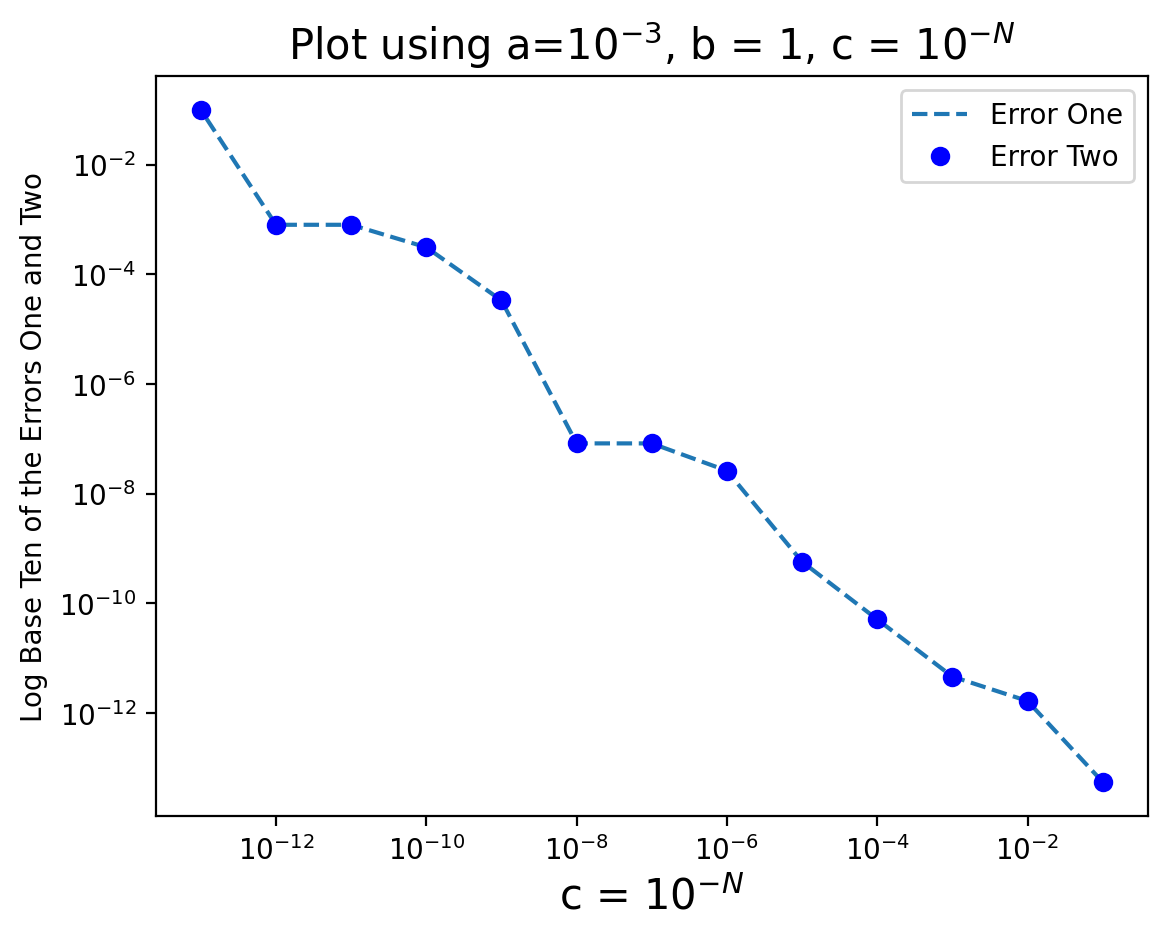

In [4]:
# your code here, a = 1e-3

#Called my functions and stored the values into the respective variables
#Odd values correspond to x1,x1' and even values correspond to x2,x2'
#Variables with a C in their name are with the subtractive error taken into account
solutionOne, solutionTwo, solutionThree, solutionFour = solutionsX(10**(-3), 1)
solutionOneC, solutionTwoC, solutionThreeC, solutionFourC = solutionsX_C(10**(-3), 1)

errorOne = []
errorTwo = []
for i in range(len(solutionOne)):
    # Made one of the solutions the actual so that I could calculate the relative error
    ## Then I appended the values into errorOne and errorTwo
    e1 = abs(divisionEps(solutionThree[i]-solutionOne[i], solutionOne[i]))
    e2 = abs(divisionEps(solutionFour[i]-solutionTwo[i], solutionTwo[i]))
    errorOne.append(e1)
    errorTwo.append(e2)
# Initialized x1 to store the values for the third parameter, c
x1 = thirdParameter()
y1 = errorOne
y2 = errorTwo

# Section where all of the plotting happens
plt.plot(x1, y1, linestyle = 'dashed')
plt.plot(x1, y2, 'bo')
# Scales the plot
plt.yscale('log')
plt.xscale('log')
# Labels for the plots
plt.xlabel("c = $10^{-N}$", size = 15)
plt.ylabel("Log Base Ten of the Errors One and Two", size = 10)
plt.title("Plot using a=$10^{-3}$, b = 1, c = $10^{-N}$", size = 15)
plt.legend(['Error One', 'Error Two'])
plt.show()


_your comment about how the error is different for small $a$ here_ 

#### When the value of a is not raised to any power, the error decreases in a much more linear manner

### Bonus (+5 points)
* **Bonus** (not required, to be done after you finish everything else on this problem set): make a two-dimensional image (something like the Mandelbrot images in the first lecture), or you can make a 3-d surface plot if you prefer (or both!), of the log of the error for each of the 4 solutions. The two-dimensional field should be $\log(c)$ on the horizontal axis and $\log(4ac)$ or $\log(a)$ on the vertical axis. Be sure to include the color scale or third axis to display the log of the error. Check that the result matches your results above in the right places.

-------------------
## Problem 3
(25 points)

Recall, the Maclaurin series for $\sin(x)$ is

$$\sin(x)=x-\frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} ... = \sum_{n=1}^\infty\frac{(-1)^{n-1} x^{2n-1}}{(2n-1)!}$$

You used this often in physics classes, probably without much thought (recall, this was one of the first analytic approximations you ever made in physics -- small amplitude oscillations of a pendulum approximate simple harmonic motion, and we'll take another look at that soon), and now we can explore the behavior of this series numerically.

First, we must make an approximation by summing only the first $N$ terms. Second, that series is numerically worrisome because: 

   - factorials are computationally expensive and are very large for large $N$. For large $x$ we must make $N$ large, as we will see. 
   - dividing two large numbers should be avoided whenever possible: you risk overflows in the numerator and/or denominator when the actual quotient is not large.
   
So, although the infinite series is, in principle, OK, with a radius of convergence that encompasses all reals (yes, you might say it's not clever to do the expansion around $x=0$), it only works for all cases on a calculator with unlimited capacity, which does not exist.


(a) First, let's do the (somewhat) wrong thing and see the consequences. Write a function that returns the nth term for some $x$ using the formula above (factorials and all). Explore: plot the value of each term for $x=1.$, $x=10.$, and $x=50.$, vs. $N$, and quantify where you get into trouble with this algorithm.


In [5]:
# your code here
#Imported math so I could use the binomial function
import math as math
def sineOne(x, n):
    sum = 0.0
    for i in range(1, n+1):
        # Break up the quotient into its numerator and the denominator
        numeratorSine = (-1)**(i-1)*(x**(2*i-1))
        # Using the factorial function from the math library
        denominatorSine = math.factorial(2*i-1)
        # Using my division function that takes into account the machine epsiolon
        sum += divisionEps(numeratorSine, denominatorSine)
    return sum
### I played with my function and it seems it can't compute sine for N > 85
#### int too large for conversion to float


Explore:

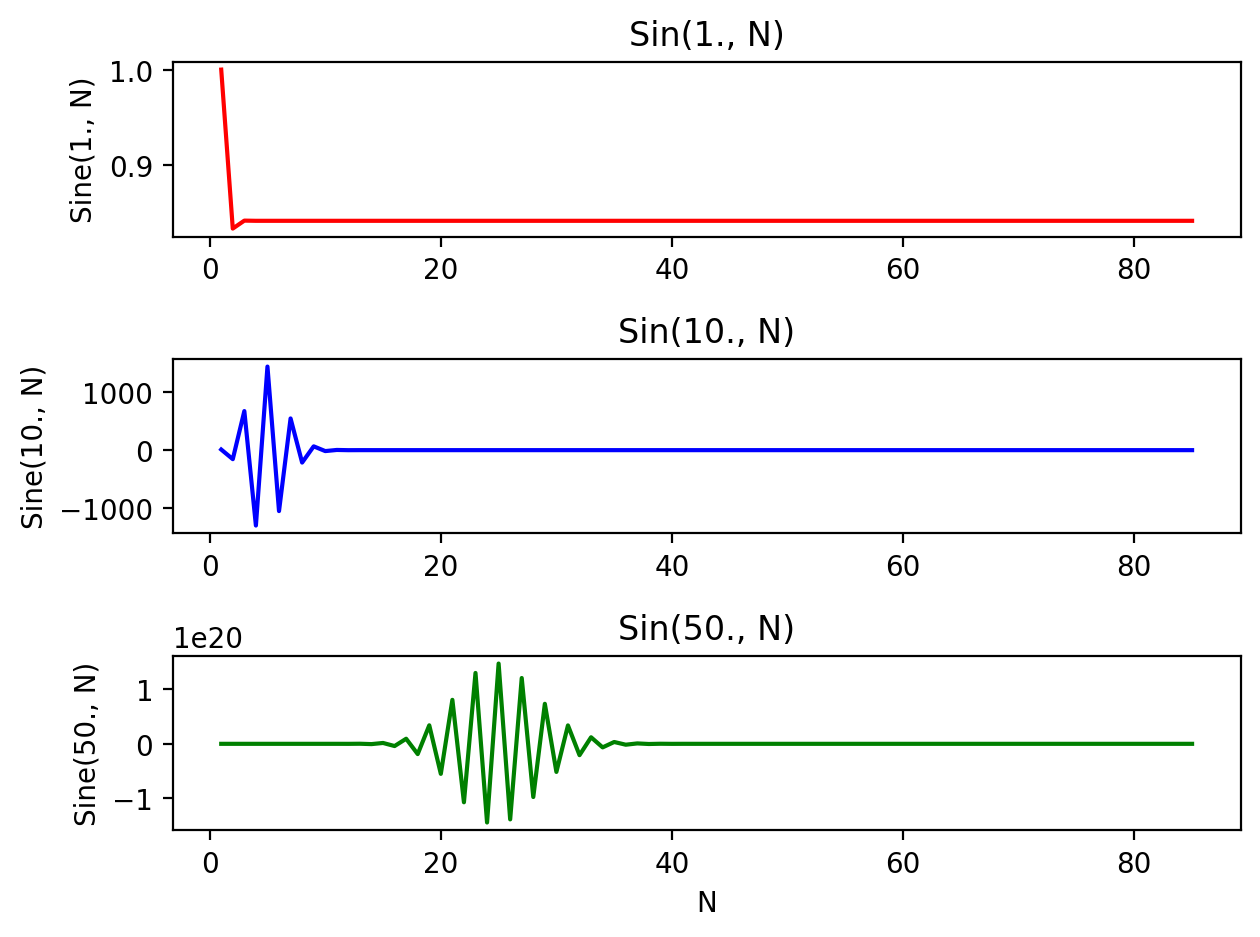

In [14]:
# your code here
n = 85
trialOne = []
trialTwo = []
trialThree = []
x = []

for i in range(1, n+1):
    y1 = sineOne(1., i)
    y2 = sineOne(10., i)
    y3 = sineOne(50., i)
    x.append(i)
    trialOne.append(y1)
    trialTwo.append(y2)
    trialThree.append(y3)
    
### I played with my function here and I found that my function cannot computer Sine(x>66)
#### The same overflow error given for N > 85 is outputted
    
# Initialized my figure
## the parameter in subplots gives the number of indeces
fig, z = plt.subplots(3)
# z[i] denotes the plot the changes will be applied to
z[0].plot(x, trialOne, 'r')
z[1].plot(x, trialTwo, 'b')
z[2].plot(x, trialThree, 'g')
# Makes the figure share the horizontal axis
plt.xlabel("N")
# Sets the vertical label for z[i]
z[0].set_ylabel("Sine(1., N)")
z[1].set_ylabel("Sine(10., N)")
z[2].set_ylabel("Sine(50., N)")
# Sets the title for z[i]
z[0].set_title("Sin(1., N)")
z[1].set_title("Sin(10., N)")
z[2].set_title("Sin(50., N)")
# Makes the figure adjust the spacing of the plots
fig.tight_layout()
plt.show()
    


your observations here:

### As noted within the code, when N > 85 it returns an overflow error, and after some tinkering I found that for values of x greater than 66, it'll also give an overflow error.

(b) You can do much better. Have a look at the textbook section 2.5.1, and make a new version of your function using that method. Make a similar plot showing this is more robust. Make the same plot as in part (a), but also add $x=100.$, along with some other large $x$ values. You might want to let $N$ be larger. However, even though we can calculate the terms now, it isn't clear it's helpful. See below.

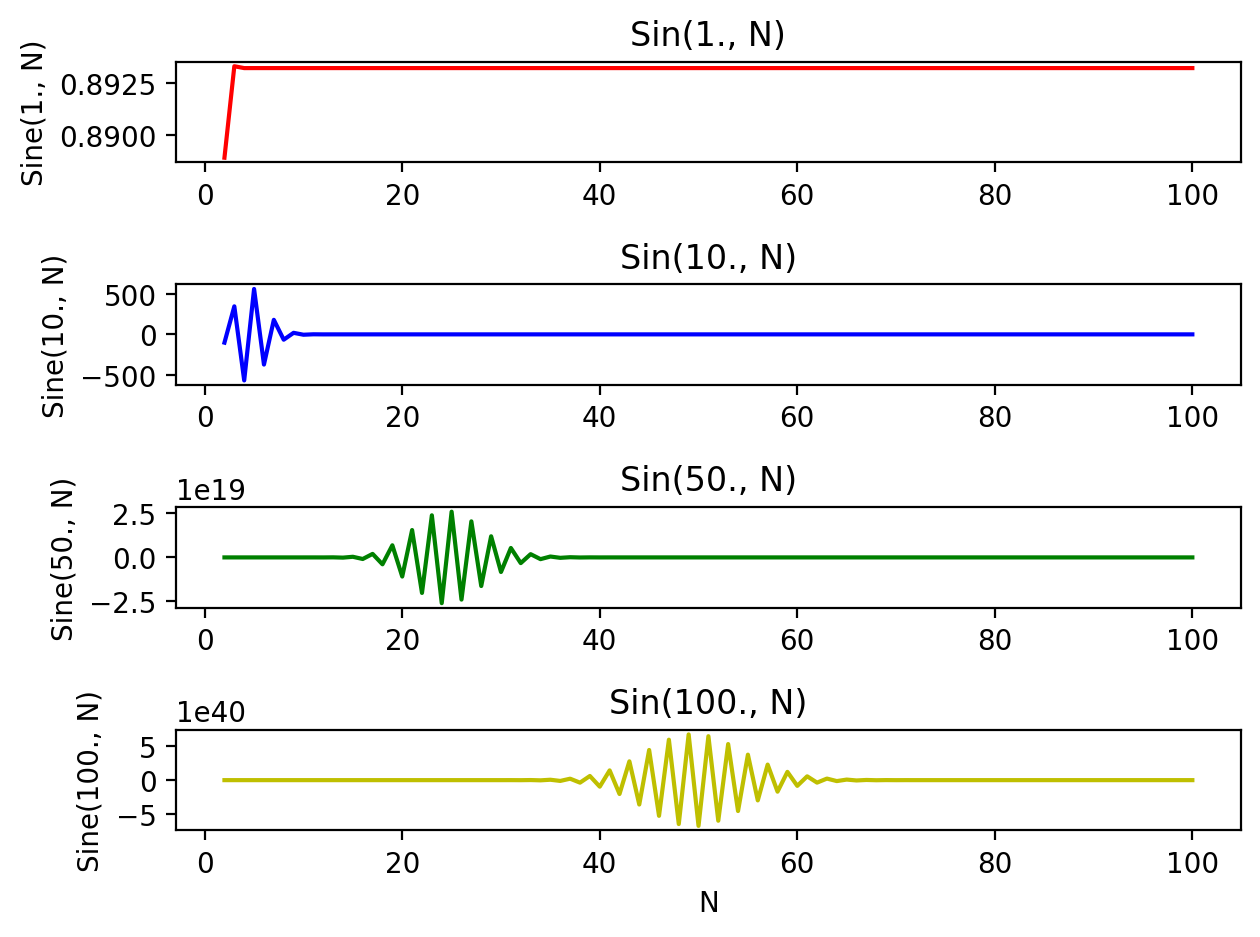

In [7]:
# your code here
n = 100
# Definition of the sine function for this second part
def sineTwo(x, n):
    eps = 10**-8
    # Term is x because the series begins with x
    term = x
    # Sum is x because the first term in the series is x
    sum = x
    # Start of my for-loop for values 2 -> n+1 (n+1) since the range would stop at n-1
    for i in range(2, n+1):
        # The nth-term is multiplied by the (n-1) term
        nthTerm = divisionEps(-x**2,(2*i-1)*(2*i-1))*term
        # Sums nth-term
        sum += nthTerm
        # Sets the (n-1) term equal to the nth-term before the next value is calculated
        term = nthTerm
    return sum
    
trialOne = []
trialTwo = []
trialThree = []
trialFour = []
x = []

for i in range(2, n+1):
    y1 = sineTwo(1., i)
    y2 = sineTwo(10., i)
    y3 = sineTwo(50., i)
    y4 = sineTwo(100., i)
    trialOne.append(y1)
    trialTwo.append(y2)
    trialThree.append(y3)
    trialFour.append(y4)
    x.append(i)

    
pic, z = plt.subplots(4)
z[0].plot(x, trialOne, 'r')
z[1].plot(x, trialTwo, 'b')
z[2].plot(x, trialThree, 'g')
z[3].plot(x, trialFour, 'y')
plt.xlabel("N")
z[0].set_ylabel("Sine(1., N)")
z[1].set_ylabel("Sine(10., N)")
z[2].set_ylabel("Sine(50., N)")
z[3].set_ylabel("Sine(100., N)")
z[0].set_title("Sin(1., N)")
z[1].set_title("Sin(10., N)")
z[2].set_title("Sin(50., N)")
z[3].set_title("Sin(100., N)")
pic.tight_layout()
plt.show()

At this point, we can at least compute the terms.

(c) Now things get more interesting. You might be wondering, __how does this series produce oscillations, and how does $\pi$ come out of it?__ It isn't obvious that this series should have the same value whenever you add or subtract $2m\pi$, where $m=1,2,3,...$. Also, having done all this work, you may be itching to see the actual results! 

Plot $\sin(x)$ in the range $-10<x<10$ for $N=1,2, 3, ..., 15$. On the same plot, show $\sin(x)$ using a built-in math function such as the one in numpy. 

You'll see that, for insufficiently large $N$, the result of your algorithm wanders far outside the valid range (-1,1) of the sine function. **To make the plot useful, you will have to truncate or limit the value when it's outside the valid range** (for example, impose that the absolute value of the result cannot be larger than 2). 

Aside: notice that, in this case, imposing periodic boundary conditions ($\sin(x+n\pi) = \sin(x)$) would have an effect that is similar, to finite precision, to that of adding more terms in the series. Remarkable!

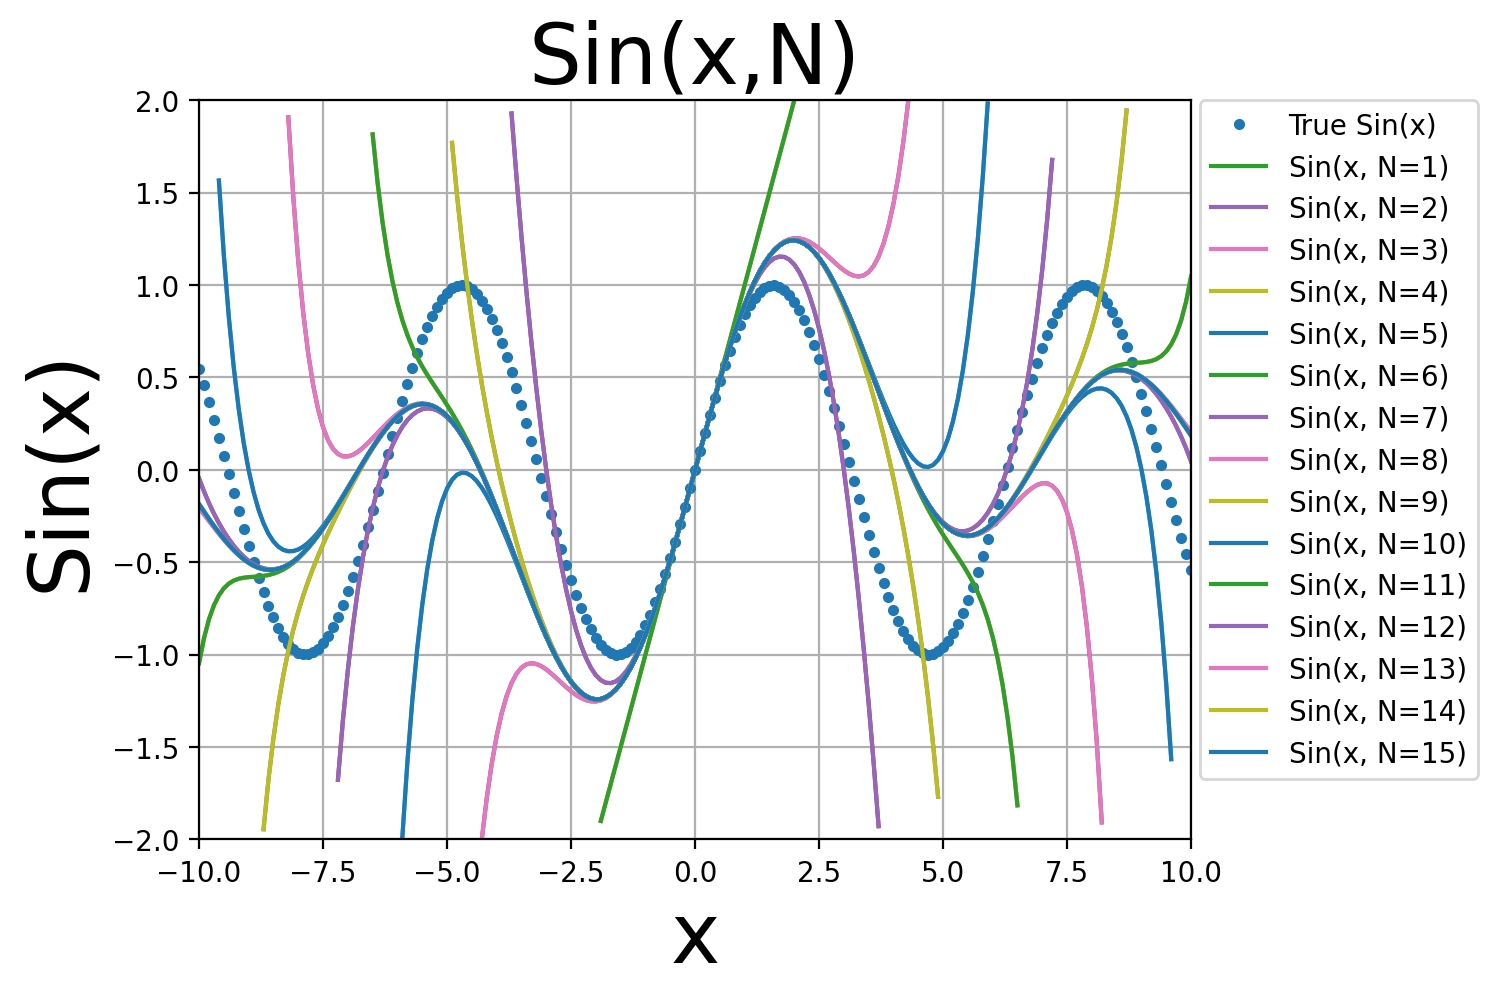

In [8]:
# your code here
n = 16
N = np.arange(n)
xRange = np.arange(-10,10.01,0.1)
yPlotOne = []
for i in range(len(xRange)):
    y1 = np.sin(xRange[i])
    # Checks if the value of the elements in my array
    ## Verifies if they are all less than or equal to 1
    if (abs(y1.all()) <= 1):
        # appends them
        yPlotOne.append(y1)
    else:
        break
# Takes care of my ranges for the True Sine function from NumPy
plt.plot(xRange, yPlotOne, '.', label = 'True Sin(x)')


# Initializes my nested for-loop
## This i corresponds to the index of N
for i in range(1,len(N)):
    # Declares the name of my arrays
    yPlotTwo = []
    xAxis = []
    # The j corresponds to the index of my xRange
    for j in range(len(xRange)):
        # Holds the N[i] values constant and varies x
        ## Continues until it reaches the end of xRange
        y2 = sineTwo(xRange[j], N[i])
        # checks if the absolute value of y2 is less than or equal to 2.0
        if (abs(y2) <= 2.0):
            # If the condition is met then it will apped to my array
            ## If the condition is met it will append the value of x
            yPlotTwo.append(y2)
            xAxis.append(xRange[j])
    # Handles the plotting for the varying values
    plt.plot(xAxis, yPlotTwo)
    # Makes the legend for my plot for the different values of N
    plt.plot(xAxis,yPlotTwo, label = "Sin(x, " f'N={N[i]}'")")
    plt.legend(bbox_to_anchor=(1.289,1),loc = 'upper right', borderaxespad = 0)
    
plt.xlim(-10,10)
plt.ylim(-2,2)
plt.xlabel("x", size = 30)
plt.ylabel("Sin(x)", size = 30)
plt.title("Sin(x,N)", size = 30)
plt.grid()
plt.show()

(d) Now, we need an accuracy estimator to decide how many terms to keep, and we'll do this by comparing the value of the nth term with the running current total. When that's $<10^{-8}$ you can stop. Make a plot of the number of terms, $N$, needed as a function of $x$. Notice two things: 
  1. there is a range of $x$ for which the result is wrong, even though the algorithm completes according to the accuracy estimator (so this is a failure) and 
  2. there is some point at which the alogorithm never completes. The trajectories in parts (a) and (b) give some perspective on this. 


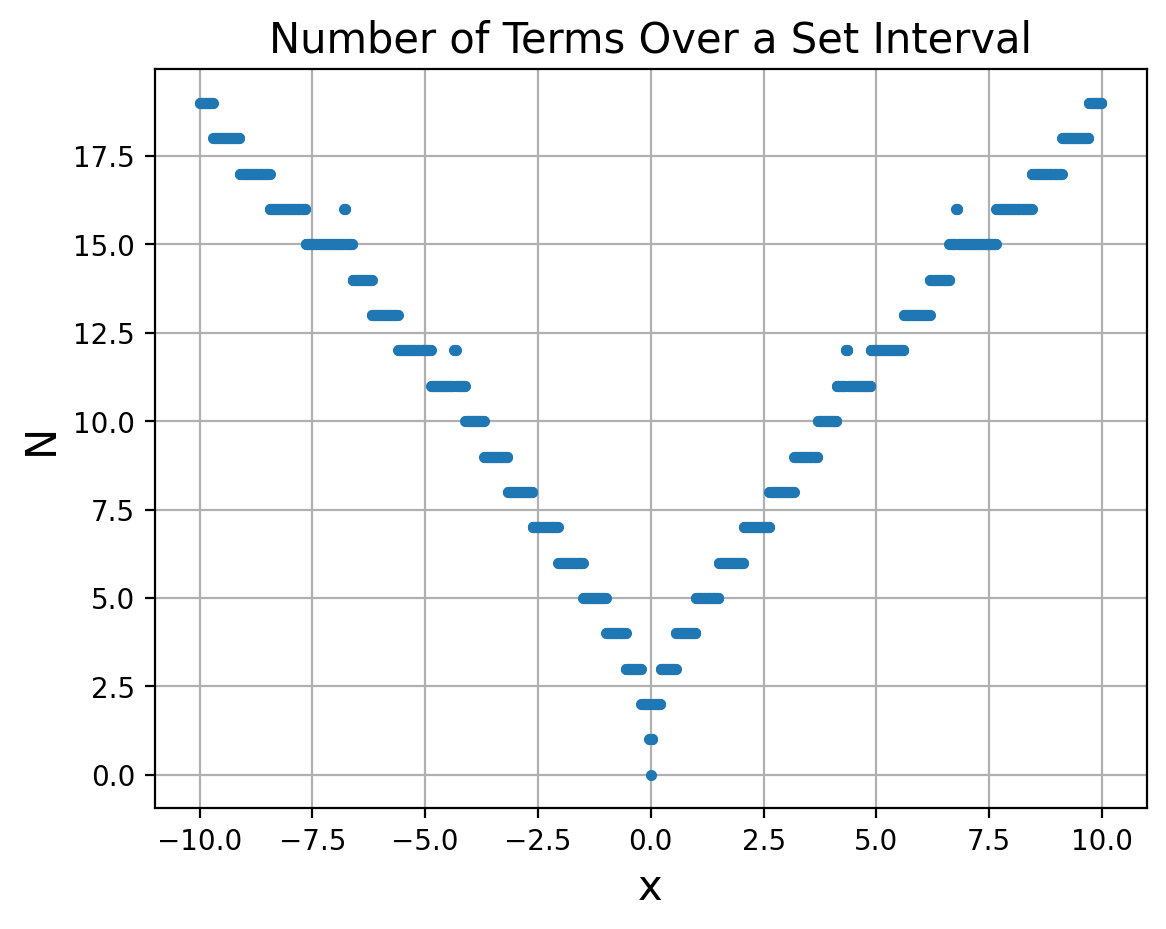

In [9]:
# your code here

# I bassically need to run the function until it meets the condition above
# Append the value of N needed, in order to meet said condition
# Made this function SineTwoPD to check if the condition was met
def sineTwoPD(x, n):
    eps = 10**-8
    term = x
    sum = x
    sumStore = []
    termsArray = []
    for i in range(2, n+1):
        term = divisionEps(-x**2,(2*i-1)*(2*i-1))*term
        sum += term
        term = term
        if (abs(term/sum) > eps):
            sumStore.append(sum)
            termsArray.append(term)
        else:
            break
            # having it return:
            ## the stored sum values, numbers used in sum, and N(termsArray)
            ### having it throw N so I know the number of terms
    return (sumStore, termsArray, len(termsArray))

N = np.arange(50)
xRange = np.arange(-10, 10, 0.01)

# Similar nested for-loop as in the previous part
for i in N:
    yValues = []
    xValues = []
    nValues = []
    for j in range(len(xRange)):
        (y, x, n) = sineTwoPD(xRange[j], N[i])
        yValues.append(y)
        xValues.append(xRange[j])
        nValues.append(n)

# Handles the plot
plt.plot(xValues, nValues, '.')
plt.xlabel("x", size = 15)
plt.ylabel("N", size = 15)
plt.title("Number of Terms Over a Set Interval", size = 15)
plt.grid()
plt.show()

(e) Finally, let's look at the accuracy trajectory: show the error as a function of $N$ for a range of $x$ values (do at least $x=5.$ and $x=0.1$), similar to what we did in lecture for the exponential (see Lectures1.ipynb). Feel free to explore and to present the information in whatever way you think is instructive. What is this telling you?

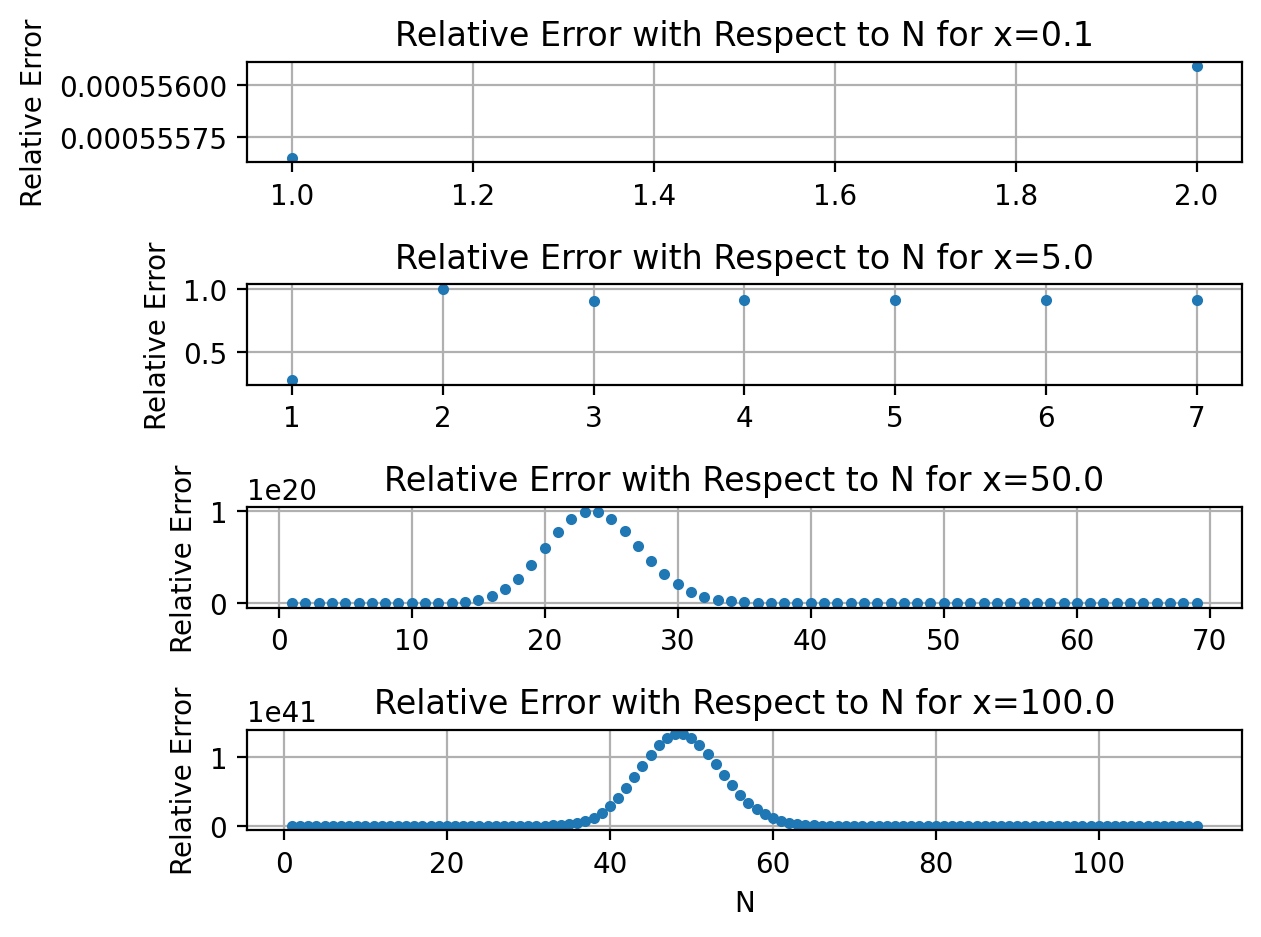

In [10]:
# your code here
N = 120
# Initialized the arrays that will hold the values of the errors
errorOne = []
errorTwo = []
errorThree = []
errorFour = []
# for-loop that will use sineTwoPD(x,n) so I can compare to np.sin(x)
for i in range(N):
    (yAppOne, x, n1) = sineTwoPD(2.5, i)
    (yAppTwo, x, n2) = sineTwoPD(0.1,i)
    (yAppThree, x, n3) = sineTwoPD(50.,i)
    (yAppFour, x, n4) = sineTwoPD(100.,i)
    y1 = np.sin(2.5)
    y2 = np.sin(0.1)
    y3 = np.sin(50.)
    y4 = np.sin(100.)
# Appends the relative error for each of the trials
errorOne.append(abs((yAppOne-y1)/y1))
errorTwo.append(abs((yAppTwo-y2)/y2))
errorThree.append(abs((yAppThree-y3)/y3))
errorFour.append(abs((yAppFour-y4)/y4))
# Sets the range for the horizontal axis for the 4 trials
nValuesOne = np.arange(1, n1+1)
nValuesTwo = np.arange(1, n2+1)
nValuesThree = np.arange(1,n3+1)
nValuesFour = np.arange(1,n4+1)
# Used the same method to plot all four plots into one
## Since the errors are arrays of arrays, I asked the last element
pic, z = plt.subplots(4)
z[1].plot(nValuesOne, errorOne[len(errorOne)-1], '.')
z[0].plot(nValuesTwo, errorTwo[len(errorTwo)-1], '.')
z[2].plot(nValuesThree, errorThree[len(errorThree)-1], '.')
z[3].plot(nValuesFour, errorFour[len(errorFour)-1], '.')
# Makes the horizontal axis label
plt.xlabel("N")
# Set the labels for the vertical
z[0].set_ylabel("Relative Error")
z[1].set_ylabel("Relative Error")
z[2].set_ylabel("Relative Error")
z[3].set_ylabel("Relative Error")
# Sets the title of the four plots
z[1].set_title("Relative Error with Respect to N for x=5.0")
z[0].set_title("Relative Error with Respect to N for x=0.1")
z[2].set_title("Relative Error with Respect to N for x=50.0")
z[3].set_title("Relative Error with Respect to N for x=100.0")
# Sets the grid for the plots
z[0].grid()
z[1].grid()
z[2].grid()
z[3].grid()
# Sets the space between the plots
pic.tight_layout()
plt.show()



Your observatrions here:
+ ### As the value of x increases so does the value of N trials.
+ ### As N increases the relative error becomes evenly distributed, or normalized.
+ ### The peak seems to be when $N_{peak}=\frac{N_{Tot}}{2}$
+ ### The peak at $N_{peak}$ gives a high relative error since it's 

----------------------------
----
## BONUS Problem 4
(+10 points)

This problem is optional, and it should be done only after you've completed the rest of the problem set.

Read section 3.2 (Error in Bessel Functions) of the texbook, and do the first four parts of the five-part problem in section 3.2.2. The principal author of the book says that students really enjoy this problem -- is the author right? It is of some interest also because you have used recursion relations in your other classes.




For purposes of comparison, also import the `scipy` version of the spherical Bessel function.

In [11]:
from scipy.special import spherical_jn

### Part 1

In [13]:
# your code here. Make a well-formatted table showing the values for those three values of x.

import pandas as pd

def p4JUP(x, l):
    jUP = []
    jZero = +np.sin(x)/x
    jOne = +np.sin(x)/x**2 - np.cos(x)/x
    jUP = np.append(jUP, jZero)
    jUP = np.append(jUP, jOne)
    if (l == 0):
        return jUP
    else:
        for i in range(1,l):
            jPlusOne = ((2*i + 1)/x)*jUP[i] - jUP[i-1]
            jUP = np.append(jUP, jPlusOne)
        return jUP
        

def p4JDWN(x, l):
    jDWN = []
    jZero = np.sin(x)/x
    jOne = np.sin(x)/x**2 - np.cos(x)/x
    jDWN = np.append(jDWN, jZero)
    jDWN = np.append(jDWN, jOne)
    L = l


y = p4JUP(0.1, 8)
df = pd.DataFrame({"UP": y})

df

,UP
0,9.983342e-01
1,3.330001e-02
2,6.661906e-04
3,9.518517e-06
4,1.056007e-07
5,-1.445698e-08
6,-1.695869e-06
7,-2.204485e-04
8,-3.306558e-02


### Parts 2 and 3
by "tune", the textbook means finding a starting $l$ for the downward recursion such that starting one $l$ larger results in a final value that fractionally differs by less than $10^{-10}$. 

### Part 4

Don't bother printing anything here. Instead, make a log-log plot with $0.1<x<10.$ along the horizontal axis and the relative difference quantity shown in the book along the vertical axis for the first 7 $l$ values. Be sure to include a legend.